In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os

from PIL import Image
from tqdm import tqdm

C:\Users\Jaehyuk Heo\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
root = '../dataset/'
ct_set = os.path.join(root,'ct_train_test/ct_train/')
mr_set = os.path.join(root,'mr_train_test/mr_train/')

In [3]:
ct_list = os.listdir(ct_set)
ct_images = list()
ct_labels = list()
for ct_l in ct_list:
    if 'image' in ct_l:
        file_path = os.path.join(ct_set, ct_l)
        fn = os.listdir(file_path)
        ct_images.append(nib.load(file_path + '/' + fn[0]))
    elif 'label' in ct_l:
        file_path = os.path.join(ct_set, ct_l)
        fn = os.listdir(file_path)
        ct_labels.append(nib.load(file_path + '/' + fn[0]))

In [4]:
mr_list = os.listdir(mr_set)
mr_images = list()
mr_labels = list()
for mr_l in mr_list:
    if 'image' in mr_l:
        file_path = os.path.join(mr_set, mr_l)
        fn = os.listdir(file_path)
        mr_images.append(nib.load(file_path + '/' + fn[0]))
    elif 'label' in mr_l:
        file_path = os.path.join(mr_set, mr_l)
        fn = os.listdir(file_path)
        mr_labels.append(nib.load(file_path + '/' + fn[0]))

In [5]:
ct_cnt = len(ct_images)
mr_cnt = len(mr_images)

# image shape

In [6]:
ct_size = list()
mr_size = list()
for ct_image in ct_images:
    ct_size.append(ct_image.shape)    
for mr_image in mr_images:
    mr_size.append(mr_image.shape)

In [7]:
ct_size

[(512, 512, 363),
 (512, 512, 239),
 (512, 512, 298),
 (512, 512, 200),
 (512, 512, 177),
 (512, 512, 248),
 (512, 512, 243),
 (512, 512, 222),
 (512, 512, 293),
 (512, 512, 274),
 (512, 512, 239),
 (512, 512, 177),
 (512, 512, 211),
 (512, 512, 358),
 (512, 512, 300),
 (512, 512, 333),
 (512, 512, 283),
 (512, 512, 187),
 (512, 512, 297),
 (512, 512, 363)]

In [8]:
mr_size

[(512, 512, 160),
 (512, 512, 128),
 (288, 288, 160),
 (288, 288, 120),
 (288, 288, 130),
 (256, 256, 160),
 (288, 288, 180),
 (288, 288, 130),
 (512, 512, 120),
 (288, 288, 160),
 (288, 288, 160),
 (512, 512, 128),
 (512, 512, 112),
 (512, 512, 160),
 (340, 340, 200),
 (288, 288, 130),
 (288, 288, 140),
 (288, 288, 150),
 (288, 288, 135),
 (288, 288, 135)]

# image resize

In [9]:
def resizing(img, resize):
    bigsize = max(img.size)
    bg = Image.new(mode='L', size=(bigsize,bigsize), color=0)
    offset = (int(round(((bigsize - img.size[0])/2),0)), int(round(((bigsize - img.size[1])/2),0)))
    bg.paste(img,offset)
    bg = bg.resize((resize,resize))
    return bg

In [10]:
def resizing_3d(images):
    processed_imgs = list()
    for img in tqdm(images):
        resized_img = np.zeros((256,256,img.shape[2]))
        pad_img = np.zeros((256,256,256))
        for i in range(img.shape[2]):
            im = Image.fromarray(img.get_data()[:,:,i])
            resized_img[:,:,i] = np.asarray(im.resize((256,256)))
            
        resized_img[resized_img<0] = 0
        
        for j in range(resized_img.shape[0]):
            im = Image.fromarray(resized_img[j,:,:])
            im =  resizing(im, 256)
            pad_img[j,:,:] = np.asarray(im)
        processed_imgs.append(pad_img)
    return processed_imgs

In [11]:
ct_pad_images = resizing_3d(ct_images)
ct_pad_labels = resizing_3d(ct_labels)

 60%|█████████████████████████████████████████████████▏                                | 12/20 [00:22<00:14,  1.78s/it]

OSError: [WinError 1455] 이 작업을 완료하기 위한 페이징 파일이 너무 작습니다

In [ ]:
mr_pad_images = resizing_3d(mr_images)
mr_pad_labels = resizing_3d(mr_labels)

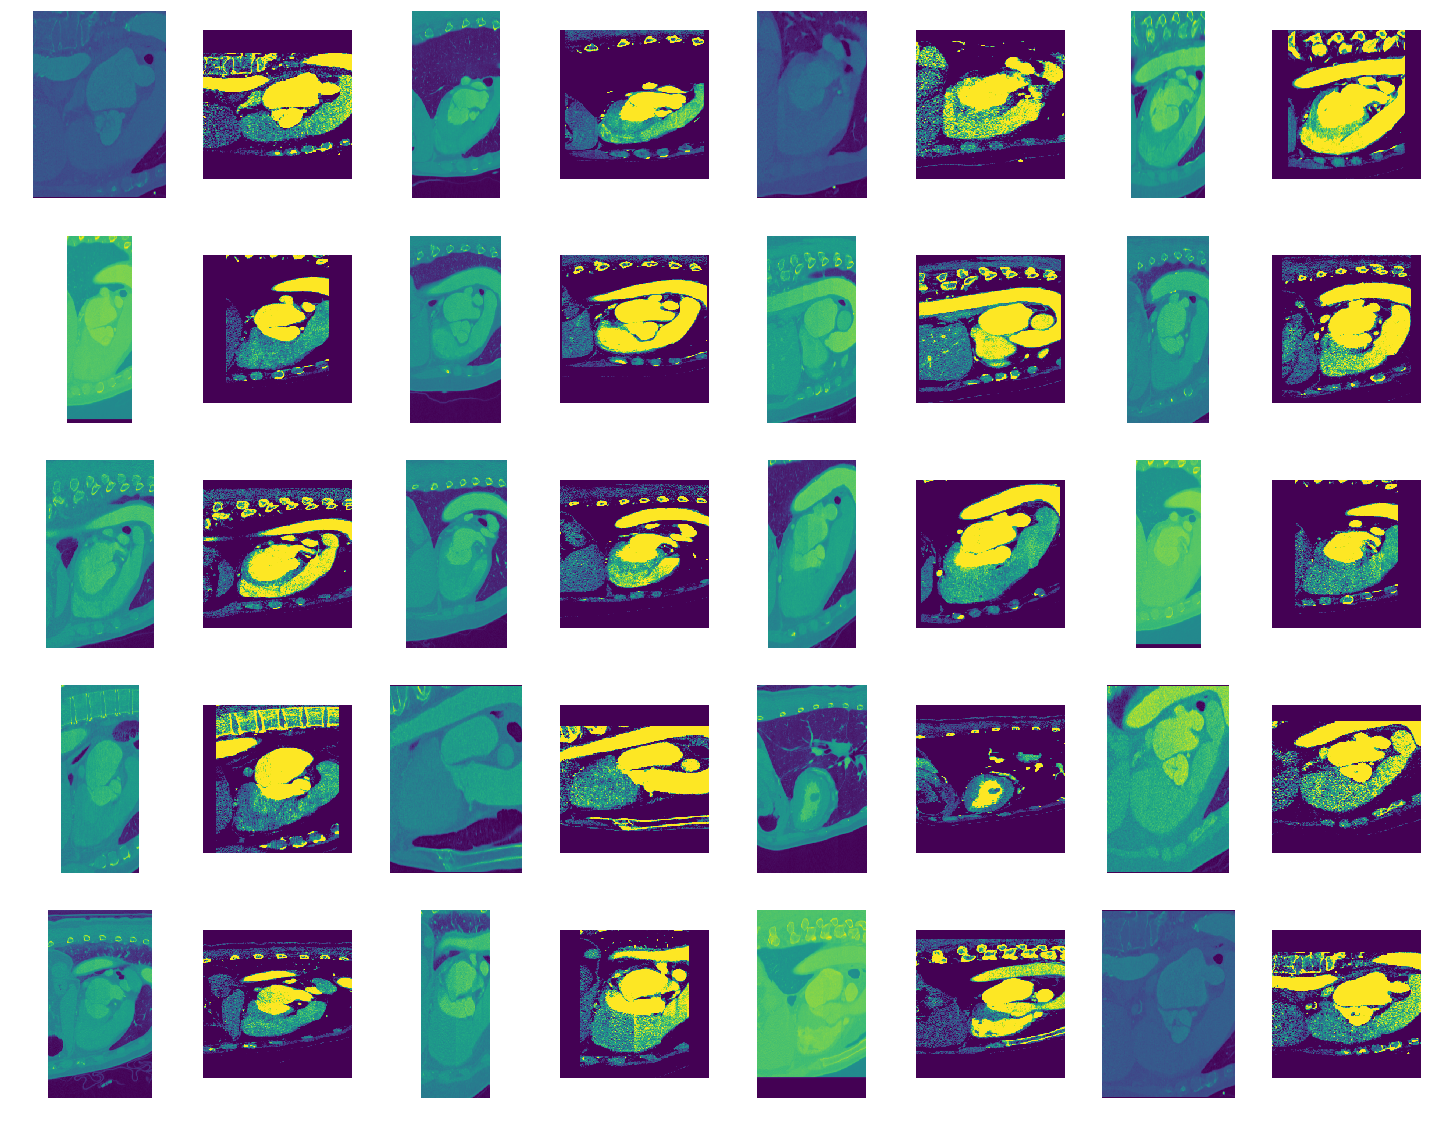

In [46]:
f, ax = plt.subplots(5,8, figsize=(25,20))
img_idx = 0
pad_idx = 0
for i in range(5*8):
    if (i%8)%2==0:
        ax[i//8,i%8].imshow(ct_images[img_idx].get_data()[256,:,:])
        ax[i//8,i%8].axis('off')
        img_idx+=1
    else:
        ax[i//8,i%8].imshow(ct_pad_images[pad_idx][128,:,:])
        ax[i//8,i%8].axis('off')
        pad_idx+=1

In [ ]:
print(ct_pad_images[0].shape)
img = nib.Nifti1Image(ct_pad_images[0], affine=np.eye(4))
nib.save(img,'./dataset/ct_imgs.nii')

In [ ]:
print(mr_pad_images[0].shape)
img = nib.Nifti1Image(mr_pad_images[0], affine=np.eye(4))
nib.save(img,'./dataset/mr_imgs.nii')

In [ ]:
print(ct_pad_labels[0].shape)
img = nib.Nifti1Image(ct_pad_labels[0], affine=np.eye(4))
nib.save(img,'./dataset/ct_labels.nii')

In [ ]:
print(mr_pad_labels[0].shape)
img = nib.Nifti1Image(mr_pad_labels[0], affine=np.eye(4))
nib.save(img,'./dataset/mr_labels.nii')

# Test image

In [18]:
ct_test_dir = './dataset/ct_train_test/ct_test/'
ct_test_list = os.listdir(ct_test_dir)
ct_test_pad_images = list()

mr_test_dir = './dataset/mr_train_test/mr_test/'
mr_test_list = os.listdir(mr_test_dir)
mr_test_pad_images = list()

In [19]:
ct_test_images = list()
for fn in ct_test_list:
    img_dir = os.path.join(ct_test_dir,fn)
    img_fn = os.listdir(img_dir)[0]
    im = nib.load(os.path.join(img_dir, img_fn))
    ct_test_images.append(im)
    
mr_test_images = list()
for fn in mr_test_list:
    img_dir = os.path.join(mr_test_dir,fn)
    img_fn = os.listdir(img_dir)[0]
    im = nib.load(os.path.join(img_dir, img_fn))
    mr_test_images.append(im)

In [20]:
print('='*100)
print('CT')
print('='*100)
for img in ct_test_images:
    print(img.shape)
    
print('='*100)
print('MR')
print('='*100)
for img in mr_test_images:
    print(img.shape)

CT
(512, 512, 224)
(512, 512, 200)
(512, 512, 276)
(512, 512, 206)
(512, 512, 271)
(512, 512, 271)
(512, 512, 288)
(512, 512, 261)
(512, 512, 300)
(512, 512, 274)
(512, 512, 298)
(512, 512, 256)
(512, 512, 287)
(512, 512, 224)
(512, 512, 288)
(512, 512, 243)
(512, 512, 248)
(512, 512, 211)
(512, 512, 297)
(512, 512, 298)
(512, 512, 187)
(512, 512, 239)
(512, 512, 230)
(512, 512, 276)
(512, 512, 206)
(512, 512, 247)
(512, 512, 239)
(512, 512, 358)
(512, 512, 298)
(512, 512, 293)
(512, 512, 287)
(512, 512, 177)
(512, 512, 222)
(512, 512, 247)
(512, 512, 256)
(512, 512, 333)
(512, 512, 230)
(512, 512, 261)
(512, 512, 177)
(512, 512, 283)
MR
(288, 288, 140)
(288, 288, 150)
(256, 256, 140)
(288, 288, 130)
(320, 320, 135)
(512, 512, 120)
(512, 512, 128)
(256, 256, 140)
(512, 512, 128)
(256, 256, 140)
(256, 256, 130)
(512, 512, 120)
(299, 299, 152)
(256, 256, 140)
(256, 256, 140)
(256, 256, 140)
(512, 512, 112)
(512, 512, 128)
(256, 256, 140)
(256, 256, 140)
(224, 224, 120)
(256, 256, 155)
(2

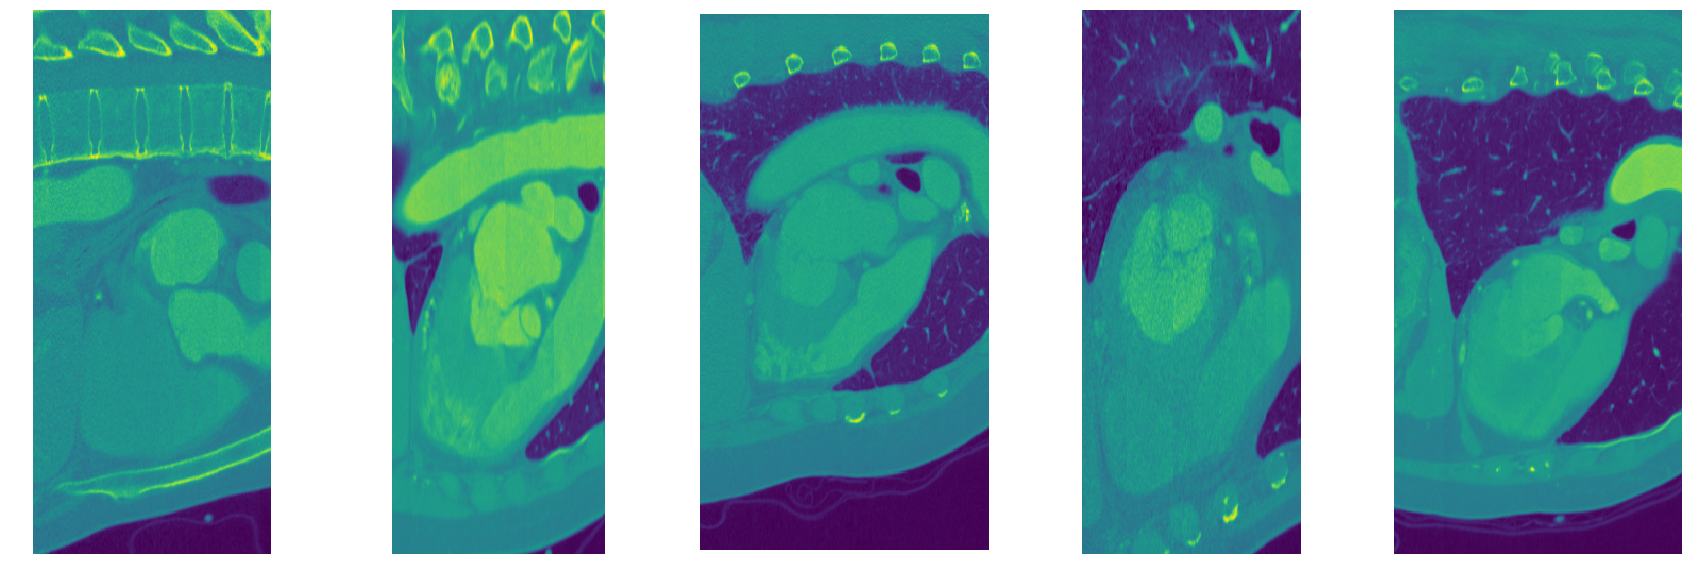

In [17]:
f, ax = plt.subplots(1,5,figsize=(30,10))
for i in range(5):
    ax[i].imshow(ct_test_images[i].get_data()[256,:,:])
    ax[i].axis('off')

In [25]:
ct_test_pad_images = resizing_3d(ct_test_images)
mr_test_pad_images = resizing_3d(mr_test_images)

 78%|███████████████████████████████████████████████████████████████▌                  | 31/40 [01:44<00:35,  3.96s/it]

MemoryError: 